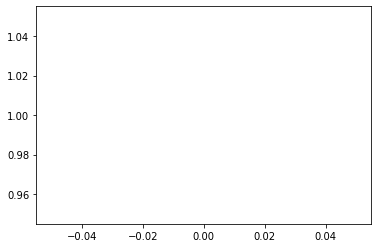

In [1]:
import matplotlib.pyplot as plt
plt.plot([1])

In [2]:
import os 
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor,MaskRCNN
import torch
import os, errno
import common.transforms as T
import cv2
import numpy as np
import matplotlib.pyplot as plt
from MyDetection import MyDetection
       
    
path_model = 'output/model_best/FastRCNN_resnet50_min_loss_b.pth'
path_model = 'output/model_best/FastRCNN_resnet50_min_loss.pth'
path_model = 'output/model/FastRCNN_resnet50_30.pth'

dec = MyDetection(path_model)


/home/aleksei/.virtualenvs/ml/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aleksei/.virtualenvs/ml/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


100%|██████████| 36/36 [00:01<00:00, 27.70it/s] 


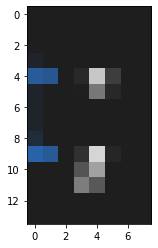

In [78]:
# детекция из тестового набора
#dec.detect_iamge('/home/aleksei/MyProject/netology/dll-19/diplom/example/CRAFT-pytorch/data/download.png')

from MyGenerator.ImageGenerator import ImageGenerator
from train_config_400_1 import configuration as conf_train
from test_config_400_1 import configuration as conf_test

i = ImageGenerator(conf_train[0:1])

img, boxs, texts = i.get_by_index(0)


images, bboxs = dec.detect_images(img)

for img in images:
    plt.imshow(img)
    plt.show()


# res = dec.detect_iamge(img)

# img_show = img.copy()

# for box in res['boxes']:
#     #box = y[0]['boxes'].view(-1)
#     x1 = int(box[0])
#     y1 = int(box[1])
#     x2 = int(box[2])
#     y2 = int(box[3])        
#     img_show = cv2.rectangle(np.asarray(img_show),(x1,y1),(x2,y2),color=(0,0,255))
# #print(img.shape)
# plt.figure(figsize=(10,10))
# plt.imshow(img_show)
# plt.show()




In [3]:
bboxs

tensor([[  7.8667, 137.2711,  75.5257, 150.6113],
        [ 68.2890, 205.1045, 100.7666, 218.9981],
        [ 78.3451, 136.9902, 169.6025, 150.6839],
        [ 77.3955, 170.6761, 126.1850, 184.9781],
        [  9.1038, 119.9222,  41.0945, 134.0925],
        [ 46.3282, 170.9231,  74.4904, 184.8197],
        [104.4893, 204.8615, 131.8323, 219.1792],
        [ 42.0274, 120.0431,  88.2218, 133.9449],
        [  9.0598, 170.5507,  44.8756, 185.1904],
        [ 30.8553, 204.7049,  66.3322, 218.8568],
        [  8.6452, 221.5551,  15.7006, 234.8121],
        [143.2545, 205.0428, 166.0082, 219.2665],
        [167.7879, 205.2511, 189.9779, 218.5437],
        [  8.8750, 188.0182,  16.0011, 200.8982],
        [191.9301, 204.9684, 198.7929, 218.5018],
        [133.9377, 204.6466, 140.9992, 218.8716],
        [159.6051, 205.8851, 167.0685, 219.0520]])

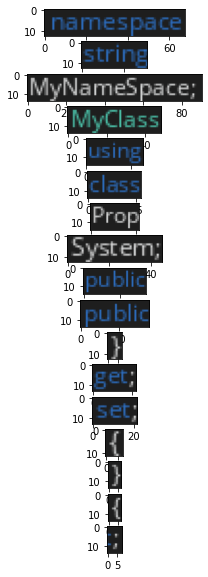

In [5]:
_,axs = plt.subplots(len(images),figsize=(5*len(images),10))

for i,img in enumerate(images):
    axs[i].imshow(img)
plt.show()

In [14]:
# #img1 = images[0] #(h,w,c)
# for i,img in enumerate(images):
#     np.save(f'for_rec_data/example_image_{i}.npy',img)

/tmp/ipykernel_216446/2544609346.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


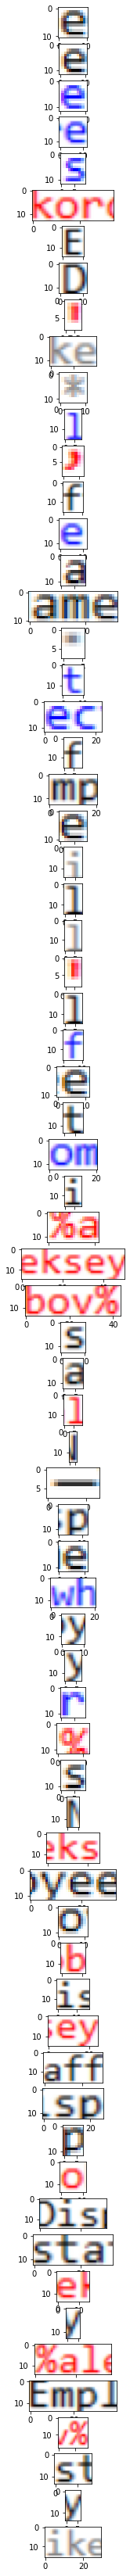

In [12]:
path_image='MyExample/im_20230302_190911.jpg'

imgs, bboxs = dec.detect_images_path(path_image)

_,axs = plt.subplots(len(imgs),figsize=(7*len(imgs),60))

for i,img_i in enumerate(imgs):
    axs[i].imshow(img_i)
plt.show()


In [10]:


convert_to_index_box([
            [1,2,3,4],
            [5,6,7,8]
        ])


[[0, [1, 2, 3, 4]], [1, [5, 6, 7, 8]]]

In [15]:
from util.my_utils import sorting_bounding_box, convert_to_index_box

bboxs1 = convert_to_index_box(bboxs.numpy())

bboxs2 = sorting_bounding_box(bboxs1)
bboxs2

[[4, 2, 11, 19, 18, 10],
 [28,
  46,
  31,
  36,
  67,
  61,
  30,
  15,
  56,
  13,
  20,
  6,
  65,
  21,
  58,
  24,
  52,
  51,
  44,
  63,
  22,
  29,
  0],
 [43,
  14,
  3,
  1,
  17,
  7,
  60,
  32,
  54,
  57,
  48,
  41,
  27,
  37,
  45,
  68,
  49,
  39,
  16,
  42,
  25,
  69,
  23,
  9,
  26,
  47,
  33,
  64,
  38,
  62,
  34,
  50,
  55,
  12,
  5,
  59,
  53,
  35,
  66,
  8],
 [40]]

In [24]:
#np.array(bboxs2).view(-1)
from operator import add
from functools import reduce

bboxs3 = reduce(add ,bboxs2)


In [30]:
len(imgs)

70

/tmp/ipykernel_216446/237072379.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


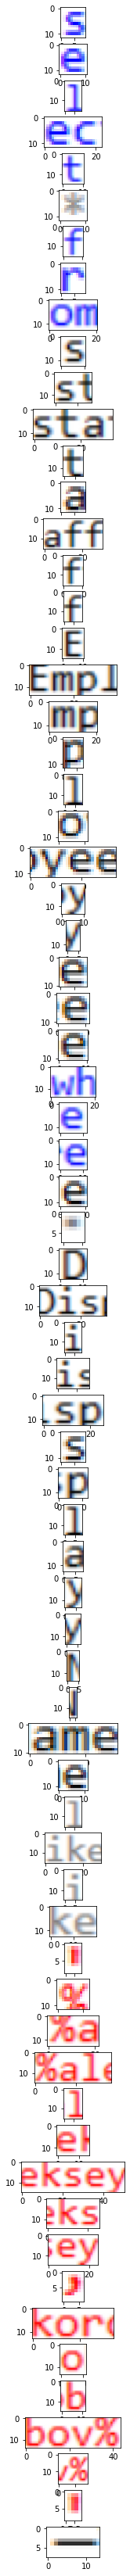

In [33]:
count = len(imgs)
#count = 6
_,axs = plt.subplots(count,figsize=(7*count,60))
it = 0
for boxs in bboxs2:
    for idx,i in enumerate(boxs):
        img_i = imgs[i]
        axs[it].imshow(img_i)
        it += 1
plt.show()
    

In [8]:
# from util.my_utils import image_box_show  
# img_res = image_box_show(img, bboxs)
# img_res

AttributeError: 'str' object has no attribute 'get_p1_p2'

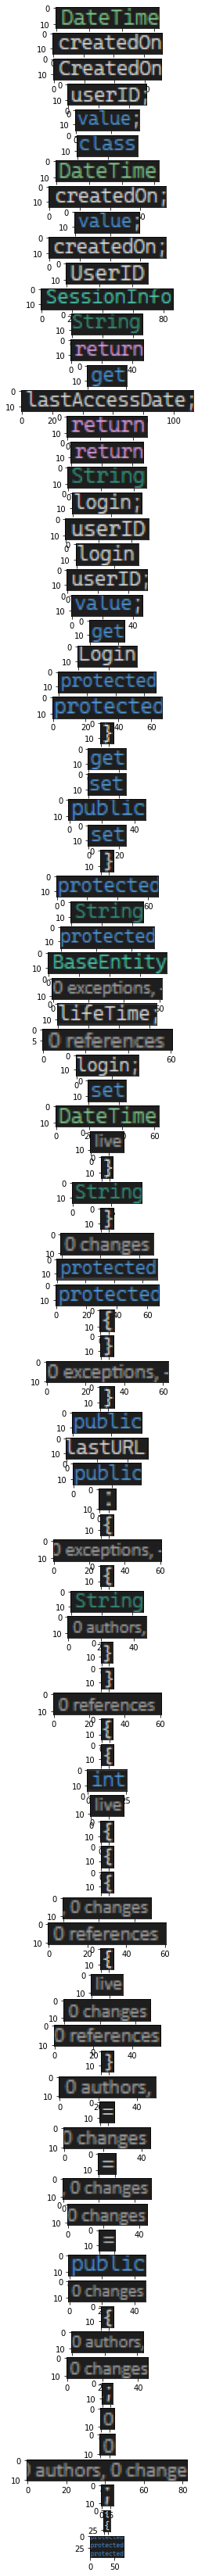

In [17]:
_,axs = plt.subplots(len(imgs),figsize=(7*len(imgs),60))

for i,img_i in enumerate(imgs):
    axs[i].imshow(img_i)
plt.show()

In [18]:
#img1 = images[0] #(h,w,c)
for i,img in enumerate(imgs):
    np.save(f'for_rec_data/image_real/example_image_{i}.npy',img)